In [ ]:
#from google.colab import drive
#drive.mount('/gdrive')

In [ ]:
#%cd /gdrive/My Drive/statistics/stats


**<font color = "red" size = 10>Insurance Charges Prediction</font>**

## **Abstract:**

HealthyLife Insurance company has gathered the data regarding the customers and wants to analyze it. Different customers have different lifestyles and hence not all can have the same medical expenditures or requirement of health insurance. To better tailor the insurance package to be given to different customers, the company now wants to integrate machine learning into the process and identify the right insurance charges for each customer.

## **Problem Statement:**
Predict how much could be the insurance charges for a beneficiary based on the data provided using Linear Regression.


## **Dataset Information:**

**Age	-** Age of Primary Beneficiary

**Sex -**Insurance Contractor gender (female, male)

**BMI -**	Body Mass Index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m^2) using the ratio of height to weight, ideally 18.5 to 24.9

**Children -** Number of children covered by health insurance / Number of dependents

**Smoker -**	Whether the beneficiary smokes or not

**Region -**	The beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

**charges -**	Individual medical costs billed by health insurance (target variable)


In [ ]:
# Import necessary libraries.
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [ ]:
# Reading the input data file
df=pd.read_csv("/content/drive/MyDrive/insurance.csv")

In [ ]:

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


<font color = "brown" size = 4>Checking the numbers of rows and columns</font>

In [ ]:
#checking the shape of data
df.shape

(1338, 7)

In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


<font color = "brown" size = 4>Lets have a look at column names</font>

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<font color = "brown" size = 4>Checking column type and missing values</font>

In [ ]:
#getting all the information of dataset using info command
#info command gives
  #1 No of rows
  #2 No of columns
  #3 No of float,int,object columns
  #4 Datatype of all the columns
  #5 Notnull values of all the columns
  #6 Memory used for storing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<font color = "brown" size = 4>Lets check the null values</font>

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<font color = "brown" size = 4>Checking the unique values</font>

In [ ]:
# Check the unique values in each column of the dataframe.
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

# **<font color = "brown" size = 7>Statistical Summary</font>**

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# **<font color = "brown" size = 7>Exploratory Data Analysis</font>**

<font color = "blue" size = 4>Univariate analysis</font>

In [ ]:
# sns.histplot(df.age,color='brown',kde=True)

**Observation :**

As above graph There are more older folks in the data than younger folks

Average Age is around 39 years

<Axes: xlabel='bmi', ylabel='Count'>

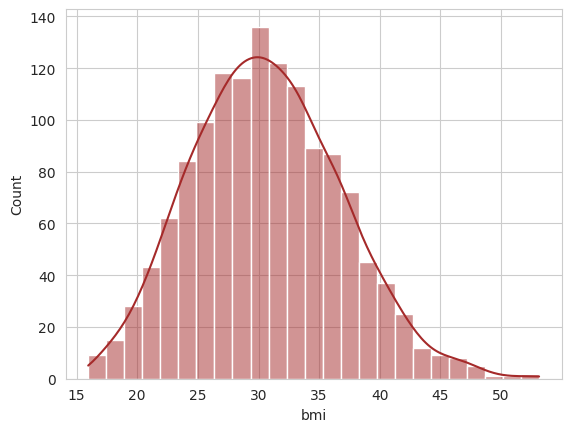

In [ ]:
sns.histplot(df.bmi,color='brown',kde=True)

# **Observation :**

As BMI increases, insurance charges also tend to go up. This might be because people with higher BMIs are more likely to have health problems, which makes them more expensive to insure.

<font color = "blue" size = 4>Bi-variate analysis</font>

<Axes: xlabel='sex', ylabel='charges'>

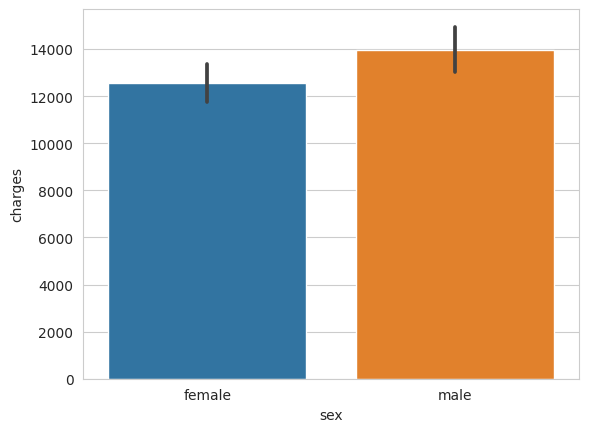

In [ ]:
sns.barplot(x='sex',y='charges',data=df)

## **Observation :**

The number of charges for females is higher than the number of charges for males.

There is a small number of charges for both females and males.

<Axes: xlabel='smoker', ylabel='charges'>

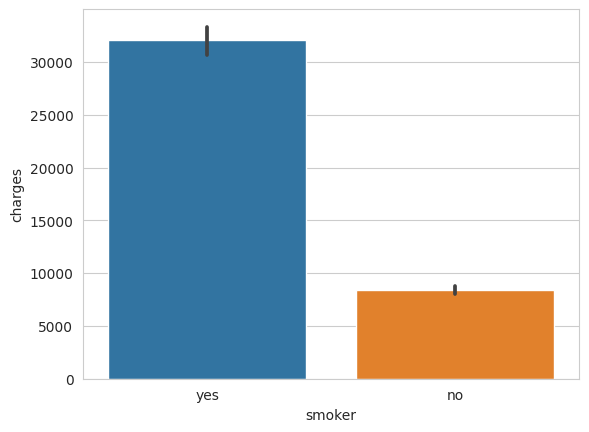

In [ ]:
sns.barplot(x='smoker',y='charges',data=df)

## **Observation :**

 The number of changes in the number of smokers over time. The  smokers has  higher than the no smokers. This suggests that the number of smokers has maximmum charges

In [ ]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
df['children']=df['children'].apply(lambda x: 'yes' if x in[1,2,3,4,5] else 'no')

In [ ]:
df['children'].value_counts()

yes    764
no     574
Name: children, dtype: int64

<Axes: xlabel='children', ylabel='charges'>

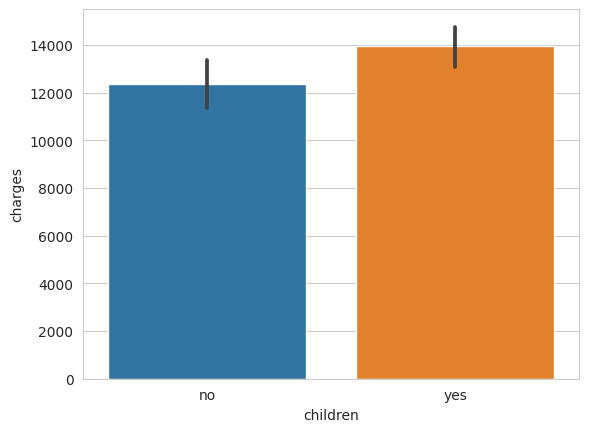

In [ ]:
sns.barplot(x='children',y='charges',data=df)

## **Observation :**

In above graph who have  children so they have maximum charges as compare to who dont have no  children so  they have minimum charges

<Axes: xlabel='region', ylabel='charges'>

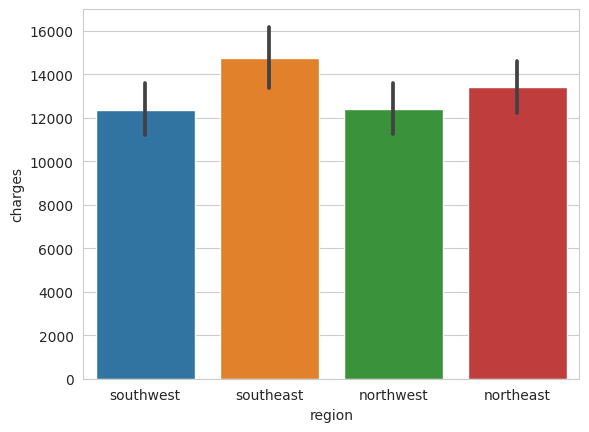

In [ ]:
sns.barplot(x='region',y='charges',data=df)

## **Observation :**
The graph shows the number of changes  in different regions of the United States. The number of changes  in the southwest region is significantly higher than the number of changes  in the all region.

<Axes: xlabel='region', ylabel='bmi'>

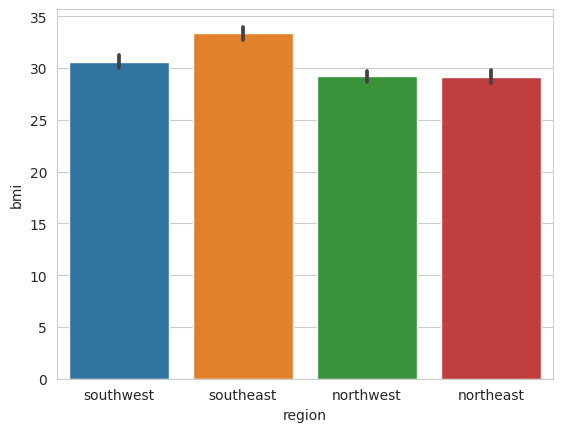

In [ ]:
sns.barplot(x='region',y='bmi',data=df)

**<font color = "blue" size = 4>Distribution of each numerical column </font>**

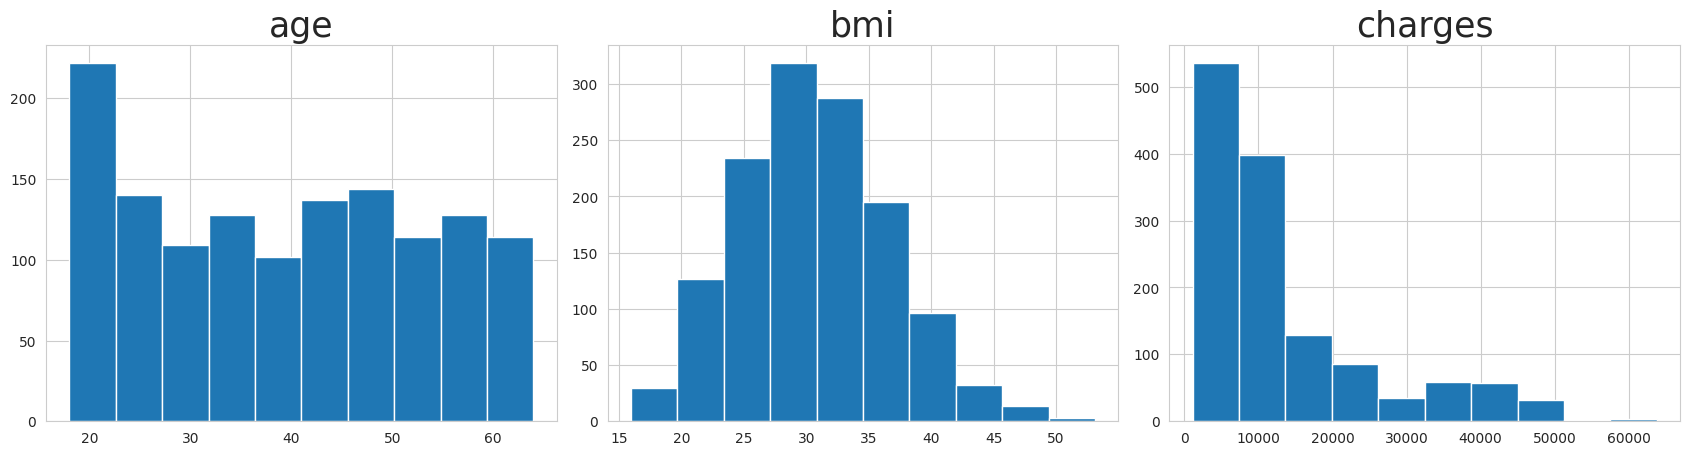

In [ ]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)


plt.show()


**<font color = "blue" size = 4>Lets look at outliers of every numerical column </font>**

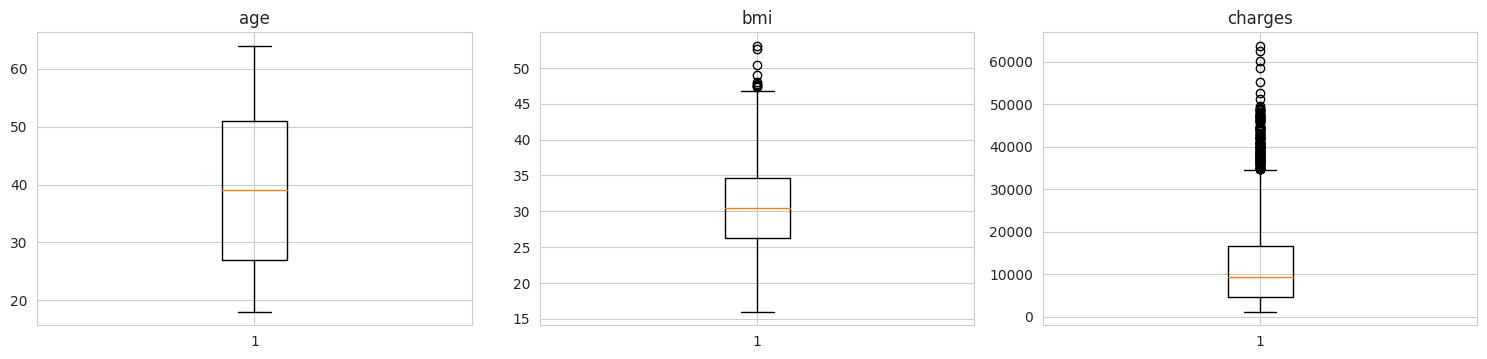

In [ ]:
#outlier detection using boxplot
plt.figure(figsize=(20,30))
for i ,variable in enumerate(all_col):
  plt.subplot(9,4,i+1)
  plt.boxplot(df[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

#  **Observations**
*   From above we can see that  Bmi and Charges column has outlier .
*   The both columns has upper outliers


We will treat these outliers as these might adversely affect the predictive power of linear model however in real life these outliers may be due to non-linear pattern in the data set or can be important information. Some time outliers in the independent variable can be adversely impact the linear model, this we can come to know by building model with and with outliers and comparing the model performances.

<font color = "blue" size = 4>Correlation </font>

In [ ]:
df.corr()

,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000


<Axes: >

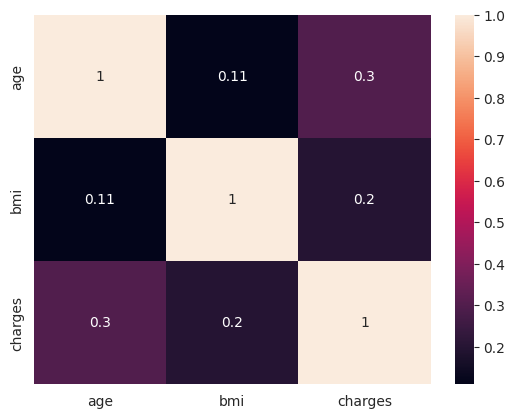

In [ ]:
sns.heatmap(df.corr(),annot=True)

## **Observation :**

we can see above there is no  correlation


**<font color = "brown" size = 7>Data preparation </font>**

*  Performing Log Transformation on Dependent variable.
*  This is done to make the data in the column more interpretable.

In [ ]:
df['charges'] = np.log(df['charges'])

<Axes: xlabel='charges', ylabel='Density'>

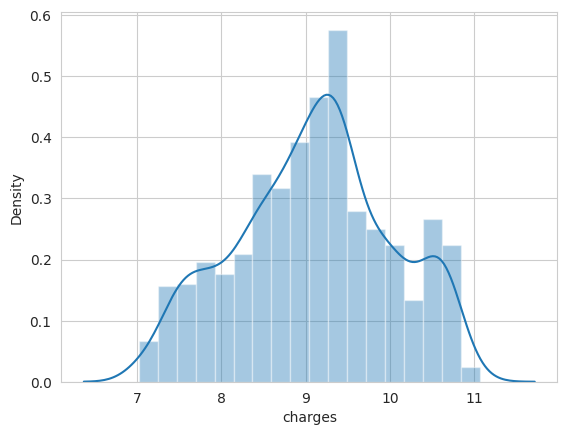

In [ ]:
sns.distplot(df.charges)

# **Observation :**

 we can see above after using log charges column has normally distributes and outliers was handled after log transformation

In [ ]:
# Capping outliers
upper_limit = df['bmi'].mean() + 3*df['bmi'].std()
lower_limit = df['bmi'].mean() - 3*df['bmi'].std()

df['bmi'] = np.where(
    df['bmi'] > upper_limit,
    upper_limit,
    np.where(
        df['bmi'] < lower_limit,
        lower_limit,
        df['bmi']
    )
)

<Axes: xlabel='bmi', ylabel='Density'>

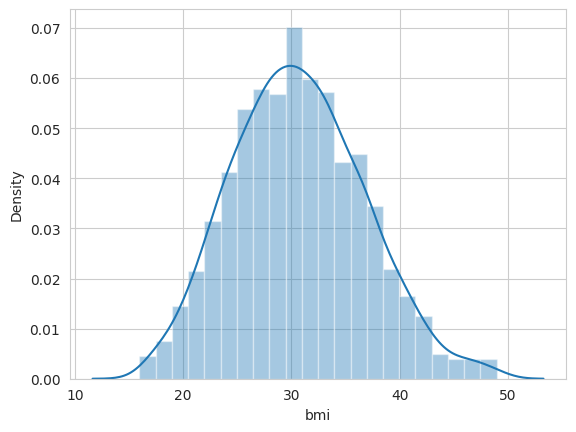

In [ ]:
sns.distplot(df.bmi)

# **Observation :**

In above bmi column has contain more column so we use here z-score capping
it can handle outlier. we use z-score due to data has already normally distributes

# **<font color = "brown" size = 7>Model Building </font>**

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,no,yes,southwest,9.734176
1,18,male,33.770,yes,no,southeast,7.453302
2,28,male,33.000,yes,no,southeast,8.400538
3,33,male,22.705,no,no,northwest,9.998092
4,32,male,28.880,no,no,northwest,8.260197


In [ ]:
# creating Dependant and independant variables
x=df.drop(["charges"],axis=1)
y=df[["charges"]]

print(x.head())
print(y.head())

   age     sex     bmi children smoker     region
0   19  female  27.900       no    yes  southwest
1   18    male  33.770      yes     no  southeast
2   28    male  33.000      yes     no  southeast
3   33    male  22.705       no     no  northwest
4   32    male  28.880       no     no  northwest
    charges
0  9.734176
1  7.453302
2  8.400538
3  9.998092
4  8.260197


In [ ]:
print(x.shape)
print(y.shape)

(1338, 6)
(1338, 1)


# **<font color = "blue" size = 4>Creating dummies for object columns </font>**

Categorical value cannot be read so we have to convert them in the numeric form so the algorithm can process the data properly

In [ ]:
#making dummies for those columns which having descrete values
x = pd.get_dummies(x, columns=["sex", "children", "smoker", "region"], drop_first = True)
x.head()

,age,bmi,sex_male,children_yes,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,1,1,0,0,1,0
3,33,22.705,1,0,0,1,0,0
4,32,28.880,1,0,0,1,0,0


In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
X_train.head()

,age,bmi,sex_male,children_yes,smoker_yes,region_northwest,region_southeast,region_southwest
332,61,31.160,0,0,0,1,0,0
355,46,27.600,1,0,0,0,0,1
138,54,31.900,0,1,0,0,1,0
381,55,30.685,1,0,1,0,0,0
292,25,45.540,1,1,1,0,1,0


# **<font color = "brown" size = 7>Model Building </font>**

In [ ]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_train)

# **<font color = "blue" size = 5>Model performances </font>**

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
sklmodel_train_perf = model_performance_regression(linearregression, X_train, y_train)
sklmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.45224,0.29524,0.758752,0.75667,NaN


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(linearregression, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.429062,0.276793,0.78016,0.775685,NaN


*   R^2 (coefficient of determination) regression score function.
*   Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.


*   R^2 value is 0.49 which means that in this model independent variables are able to explain 49% of variances in dependent variable


# **<font color = "brown" size = 5>Conclusion </font>**

The Training and testing scores are around 49% and both scores are comparable.

R2_score is 0.49, that explains 49% of total variation in the dataset. So, overall the model is not good enough.

# **<font color = "brown" size = 8>Linear Regression using stats model </font>**
​
Here is the complete syntax to perform the linear regression in Python using statsmodels.
Statsmodels is a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration


In [ ]:
# Lets us build linear regression model using statsmodel

x = sm.add_constant(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train,x_train)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     364.4
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          4.36e-280
Time:                        16:39:25   Log-Likelihood:                -585.37
No. Observations:                 936   AIC:                             1189.
Df Residuals:                     927   BIC:                             1232.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0223      0.089  

## **<font color = "blue" size = 5>Observation </font>**

P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) than any variable with p-values less than 0.05 would be considered significant.
Negative values of coefficient shows that, Life expectancy deceases with their increase.
Positive values of coefficient shows that, Life expectancy inceases with their increase.
But these variables might contain Multicollinearity which affects the p values, so we first need to deal with multicollinearity and then look for p values

## **<font color = "blue" size = 5>Interpreting the Regression Results </font>**



1   Adjusted. R-squared: It reflects the fit of the model.



*   R-squared values range from 0 to 1, where a higher value generally
   indicates a better fit, assuming certain conditions are met.
* In our case, the value for Adj. R-squared is 0.75, which is okay!



2   Const coefficient is the Y-intercept.

*   It means that if all the dependent variables (features: like age, bmi and so on..) coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.






3   Std err: It reflects the level of accuracy of the coefficients.



*   The lower it is, the higher is the level of accuracy.



4    P >|t|: It is p-value
*   Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis

    Ho : Independent feature is not significant

    Ha : Independent feature is that it is significant



*   Pr(>|t|) gives P-value for each independent feature to check that null hypothesis. we are considering 0.05 (5%) as significance level

*   A p-value of less than 0.05 is considered to be statistically significant.









# **<font color = "brown" size = 5>Test of Multicolinearity </font>**

*   Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.
*   There are different ways of detecting(or testing) multi-collinearity, one such way is Variation Inflation Factor.
*   Variance Inflation factor: Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient βkis “inflated”by the existence of correlation among the predictor variables in the model.
*   General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and hence the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series([variance_inflation_factor(x.values,i) for i in range(x.shape[1])],index=x.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const               36.025774
age                  1.017738
bmi                  1.106544
sex_male             1.008741
children_yes         1.003880
smoker_yes           1.012099
region_northwest     1.519226
region_southeast     1.652025
region_southwest     1.529003
dtype: float64



## **<font color = "black" size = 5>Observation </font>**

Since all the VIF values are below 5. Lets us now try check for the R2 and Adjusted R2

In [ ]:
olsmod1 = sm.OLS(y_train, x_train)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     364.4
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          4.36e-280
Time:                        16:39:25   Log-Likelihood:                -585.37
No. Observations:                 936   AIC:                             1189.
Df Residuals:                     927   BIC:                             1232.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0223      0.089  

##  **<font color = "black" size = 5>Observation </font>**
*   After treating Multicollinearity R-squared is  0.53 which is not good enough.
*   Now the above model has no multicollinearity, so we can look at p values of predictor variables to check their significance



**<font size = 5 color = "blue"> Significance Test </font>**

<font size = 3>Let's drop the variable 'Number_of _Vehicles', since it has highest p value among all with p value greater than 0.05</font>

In [ ]:
x_train2 = x_train.drop(['region_northwest'], axis=1)

In [ ]:
ols_model = sm.OLS(y_train, x_train2)
ols_model = ols_model.fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     415.3
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          8.64e-281
Time:                        16:39:25   Log-Likelihood:                -586.82
No. Observations:                 936   AIC:                             1190.
Df Residuals:                     928   BIC:                             1228.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.9911      0.088  

##  **<font color = "black" size = 5>Observation </font>**

Now no feature has p value greater than 0.05, so we'll consider features in X_train2 as the final ones and ols_model as final model.

*   Now Adjusted R-squared is 0.75, Our model is able to explain 75% of variance.
*   The Adjusted-R squared in Olsres1 it was 75% (Where we considered all the variables) this shows that the variables we dropped were not affecting the model much.


# **<font color = "brown" size = 7>Checking the Linear Regression Assumptions </font>**

* Linearity of variables
* Normality of error terms
* Homoscedasticity
* Independence of errors from predictor variables


**<font color = "blue" size = 5>Mean of residual should be zero</font>**

In [ ]:
residual= ols_model.resid
np.mean(residual)

6.230533657853656e-15

Mean of residual is close to zero

# **<font color = "blue" size = 5>Test for Linearity</font>**


**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs Residuals, if they don’t follow any pattern, they we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear

In [ ]:
residual=ols_model.resid
fitted=ols_model.fittedvalues #predicted values

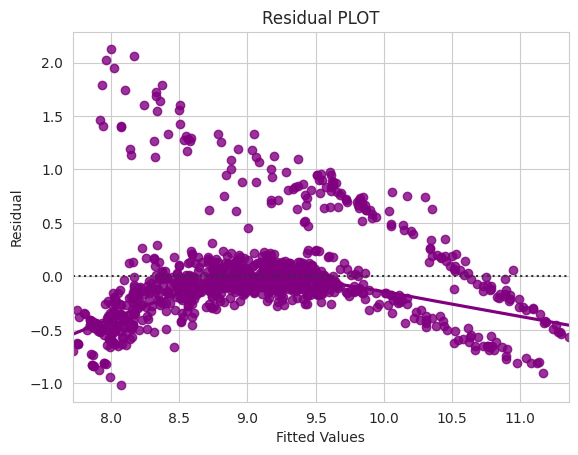

In [ ]:


# Set Seaborn style
sns.set_style("whitegrid")

# Create residual plot
sns.residplot(x=fitted, y=residual, color="purple", lowess=True)

# Set labels and title
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")

# Show the plot
plt.show()


# **<font color = "black" size = 5>Obsrvation</font>**

Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) - If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn’t capture non-linear effects.


# **<font color = "blue" size = 5>Test for  Normality</font>**

**What is the test?**

* Error terms/Residuals should be normally distributed

* If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

**What do non-normality indicate?**

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to Check the Normality?**

* It can be checked via QQ Plot, Residuals following normal distribution will make a straight line plot otherwise not.

* Other test to check for normality : Shapiro-Wilk test.

**What is the residuals are not-normal?**

* We can apply transformations like log, exponential, arcsinh etc as per our data

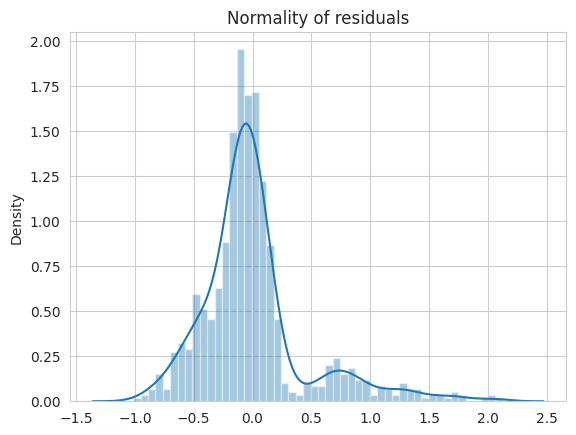

In [ ]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

#### The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line

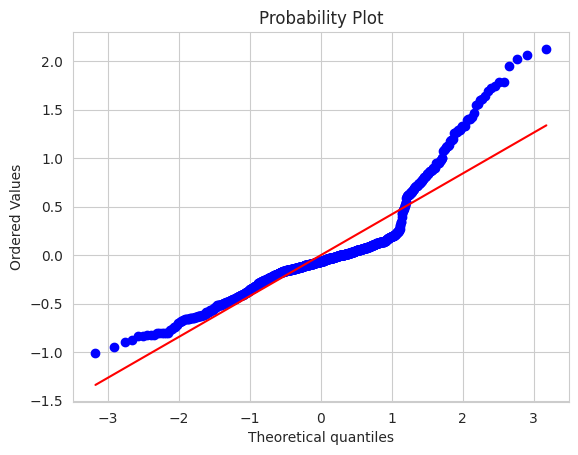

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

In [ ]:
stats.shapiro(residual)

ShapiroResult(statistic=0.8603639602661133, pvalue=5.114040226023007e-28)

* The residuals are not normal as per shapiro test, but as per QQ plot they are approximately normal.
* The issue with shapiro test is when dataset is big, even for small deviations, it shows data as not normal
* Hence we go with QQ plot and say that residuals are normal
* We can try to treat data for outliers and see if that helps in further normalising the residual curve

# **<font color = "blue" size = 5>Test of Homoscedasticity</font>**


* Test - goldfeldquandt test

* Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, x_train2)
lzip(name, test)

[('F statistic', 1.0926007427765922), ('p-value', 0.17130053159134634)]

# **<font color = "black" size = 5>Observation</font>**
Since p-value > 0.05 we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.

 ***Now we have checked all the assumptions and they are satisfied, so we can move towards prediction part***

# **<font color = "blue" size = 5>Predicting on the test data</font>**

In [ ]:
x_train2.columns

Index(['const', 'age', 'bmi', 'sex_male', 'children_yes', 'smoker_yes',
       'region_southeast', 'region_southwest'],
      dtype='object')

* Selecting columns from test data that we used to create our final model

In [ ]:
x_test_final = x_test[x_train2.columns]

In [ ]:
x_test_final.head()

,const,age,bmi,sex_male,children_yes,smoker_yes,region_southeast,region_southwest
764,1.0,45,25.175,0,1,0,0,0
887,1.0,36,30.020,0,0,0,0,0
890,1.0,64,26.885,0,0,1,0,0
1293,1.0,46,25.745,1,1,0,0,0
259,1.0,19,31.920,1,0,1,0,0


In [ ]:
y_pred = ols_model.predict(x_test_final)

# **<font color = "blue" size = 5>Checking the performance on train and test</font>**

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
sklmodel_train_perf = model_performance_regression(ols_model, x_train2, y_train)
sklmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.452941,0.296382,0.758003,0.755915,NaN


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(ols_model, x_test_final, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.429277,0.275841,0.77994,0.77546,NaN


## **<font color = "blue" size = 5>Conclusion </font>**

In [ ]:
from sklearn import metrics

def get_r2_score(model):
    '''
    model: classifier to predict values of X

    '''

    pred_train = model.predict(x_train)  # Predict on training set
    pred_test = model.predict(x_test)  # Predict on test set

    # Calculate and print accuracy scores
    print("R2 on training set: ", metrics.r2_score(y_train, pred_train))
    print("R2 on test set: ", metrics.r2_score(y_test, pred_test))


# **<font color = "brown" size = 7>Decision Tree </font>**

# **Model Building**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [ ]:
model = DecisionTreeRegressor(criterion='squared_error', random_state=1)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
get_r2_score(model)

R2 on training set:  0.9994709362280942
R2 on test set:  0.7142831549196564


### **<font color = "black" size = 5>Observation </font>**
we can see that model is overfit it perform good on train but not on test so we can fix it using Pre-prunning and post-prunning

# **<font color = "blue" size = 5>Vizualize the  Tree </font>**

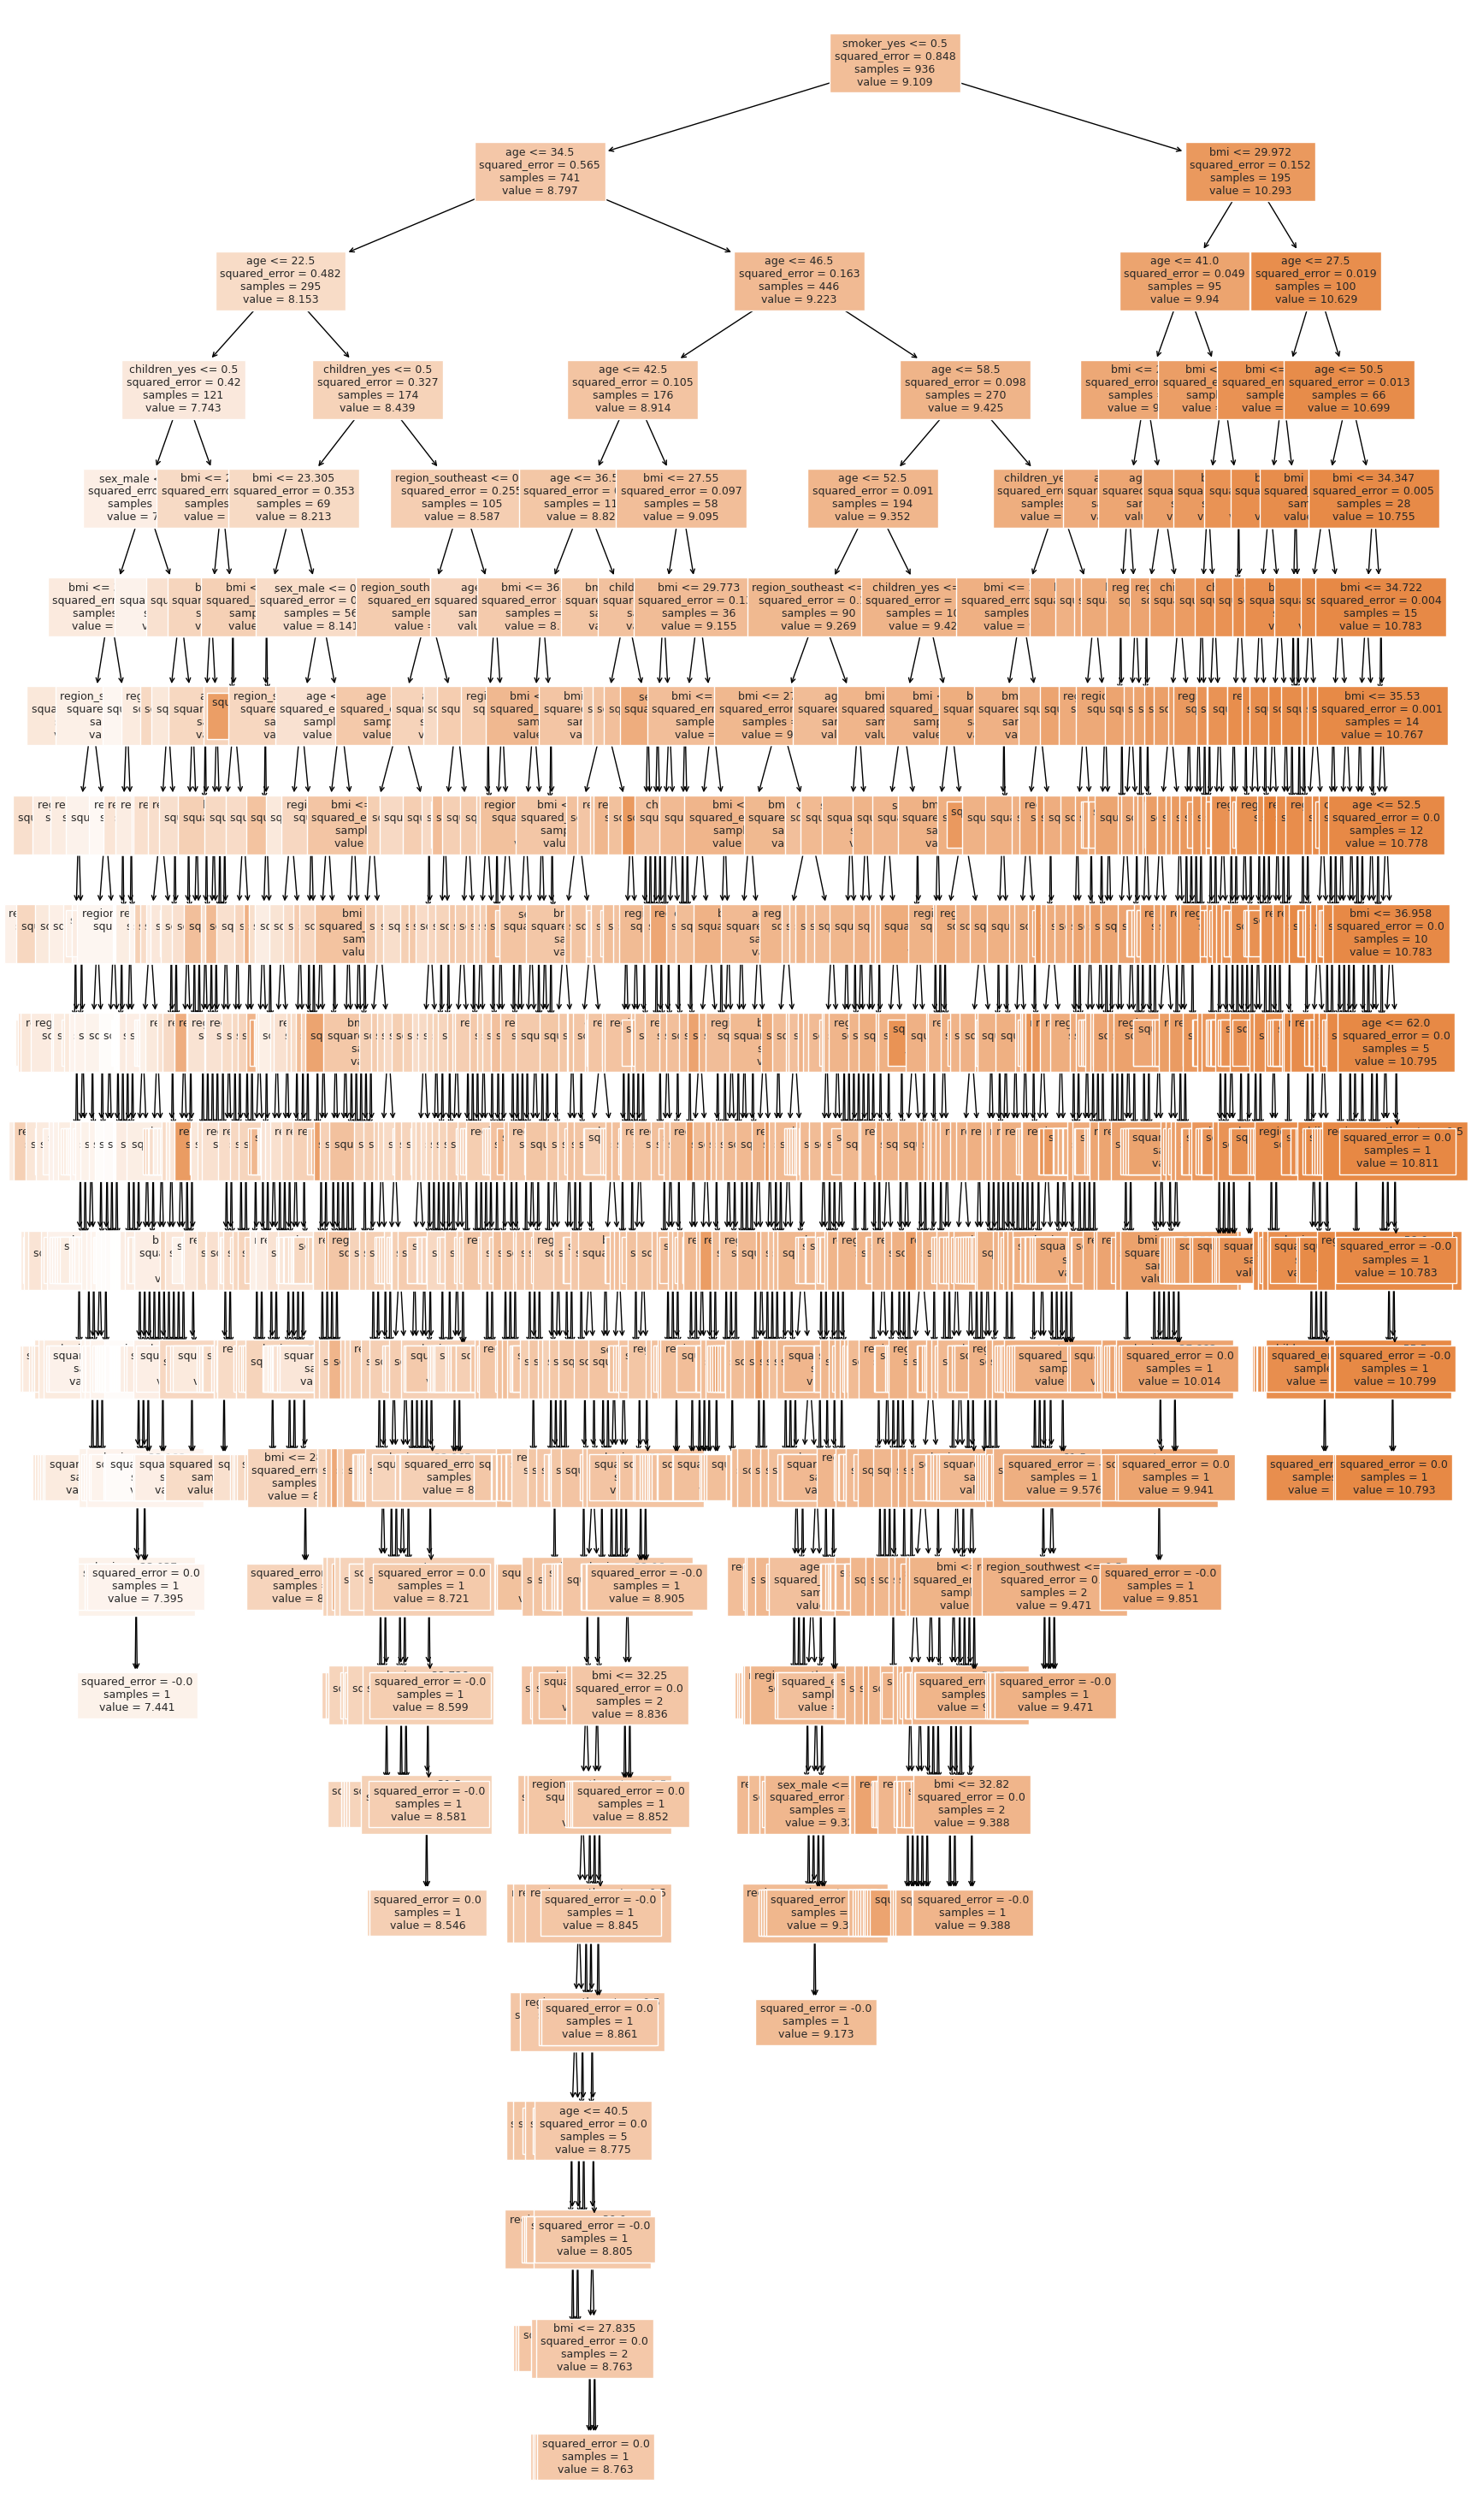

In [ ]:
feature_names = x.columns
plt.figure(figsize=(20,38))
out = tree.plot_tree(model,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()


### **<font color = "brown" size = 6>pre-prunning </font>**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Choose the type of regressor.
regressor = DecisionTreeRegressor()

# Grid of parameters to choose from
parameters = {
    # Grid of parameters to choose from

    'criterion': ['mse', 'friedman_mse', 'poisson', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better=False)

# Run the grid search
grid_obj = GridSearchCV(regressor, parameters, scoring=scorer, cv=5)
grid_obj.fit(x_train, y_train)

# Set the regressor to the best combination of parameters
regressor = grid_obj.best_estimator_

# Fit the best algorithm to the data.
regressor.fit(x_train, y_train)


DecisionTreeRegressor(criterion='absolute_error', max_depth=30,
                      min_samples_leaf=4, min_samples_split=10,
                      splitter='random')

In [ ]:
get_r2_score(regressor)

R2 on training set:  0.8472500367197902
R2 on test set:  0.8192487811098073


### **<font color = "black" size = 5>Observation </font>**
we can see the r-square test and train there is maximum difference between each other and we need just difference within 2% so  here our model not good

# **<font color = "brown" size = 6>Vizualize the  pre-prunning Tree </font>**

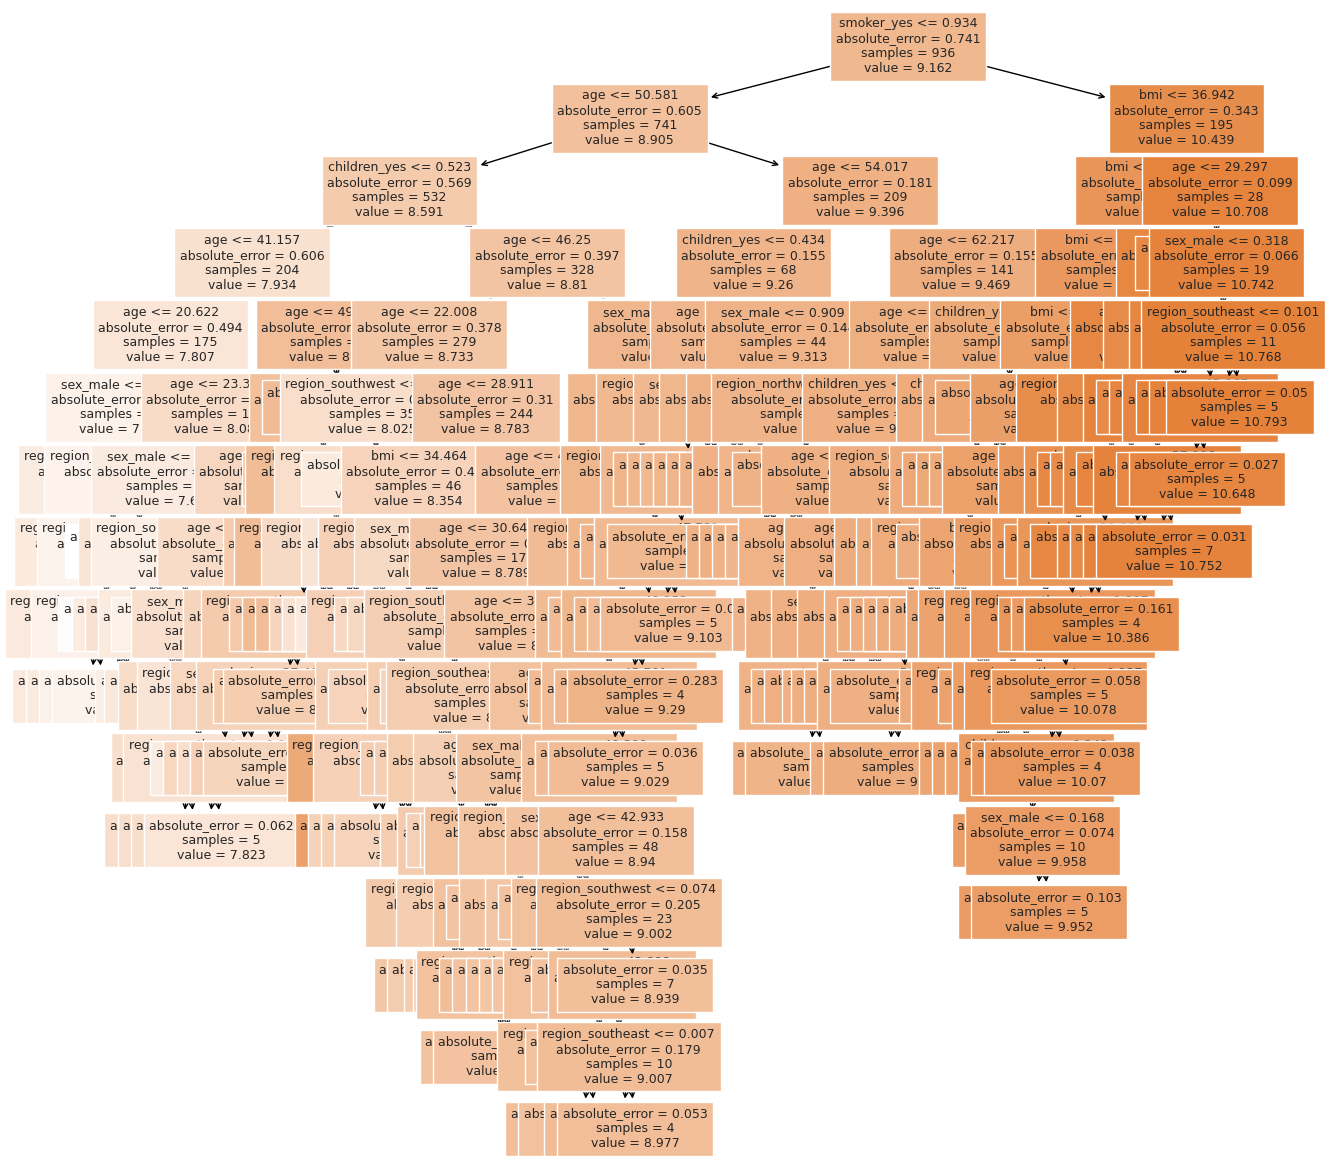

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming you have already defined regressor and feature_names

plt.figure(figsize=(15, 15))
out = plot_tree(regressor, feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None)

# Below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()


### **<font color = "brown" size = 6>post-prunning </font>**

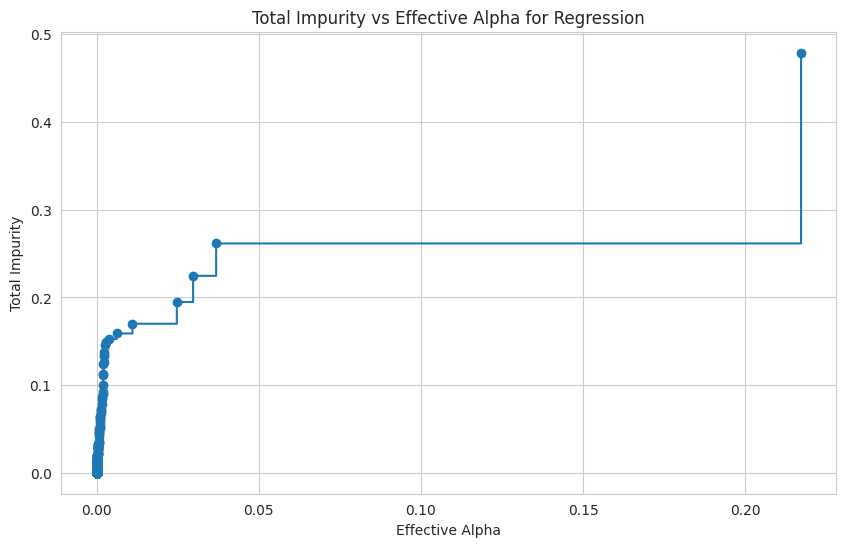

In [ ]:
# Assuming x_train and y_train are your training data
regressor = DecisionTreeRegressor(random_state=1)

# Calculate the cost-complexity pruning path
path = regressor.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the effective alphas and impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity")
plt.title("Total Impurity vs Effective Alpha for Regression")
plt.show()

In [ ]:
regressors = []
for ccp_alpha in ccp_alphas:
    regressor = DecisionTreeRegressor(random_state=1, ccp_alpha=ccp_alpha)
    regressor.fit(x_train, y_train)
    regressors.append(regressor)

# Print the number of nodes in the last tree
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
    regressors[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.36905989758414626


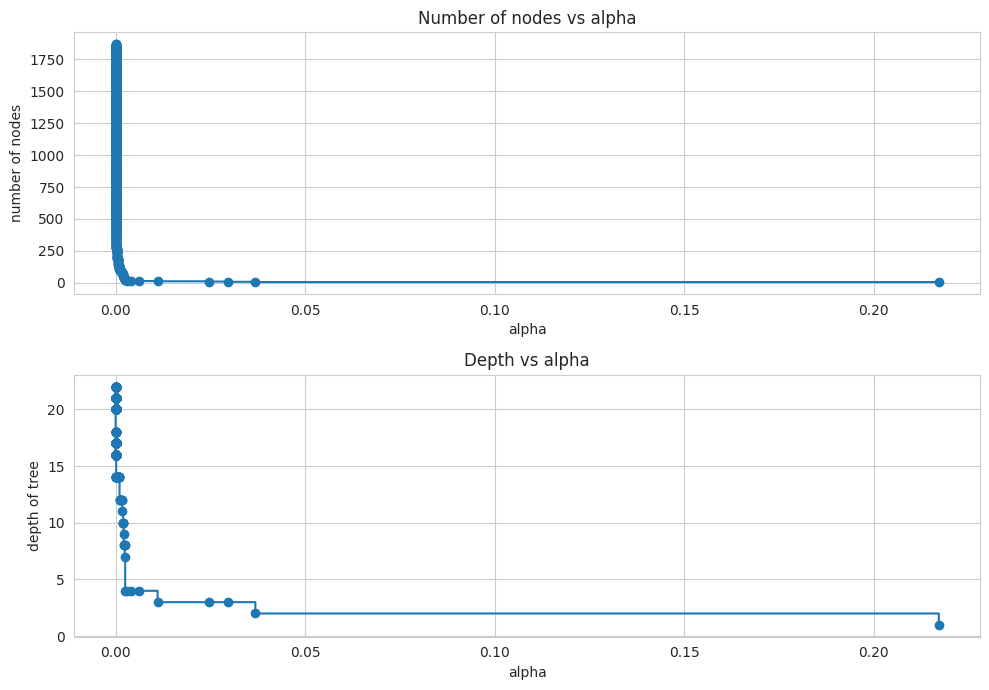

In [ ]:
regressors = regressors[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [regressor.tree_.node_count for regressor in regressors]
depth = [regressor.tree_.max_depth for regressor in regressors]

fig, ax = plt.subplots (2, 1, figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")

ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")

ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")

ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")

ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
r2_train = []
for regressor in regressors:
    pred_train = regressor.predict(x_train)
    r2_train.append(metrics.r2_score(y_train, pred_train))


In [ ]:
r2_test = []
for regressor in regressors:
    pred_test = regressor.predict(x_test)
    r2_test.append(metrics.r2_score(y_test, pred_test))


In [ ]:
train_scores = [regressor.score(x_train, y_train) for regressor in regressors]
test_scores = [regressor.score(x_test, y_test) for regressor in regressors]

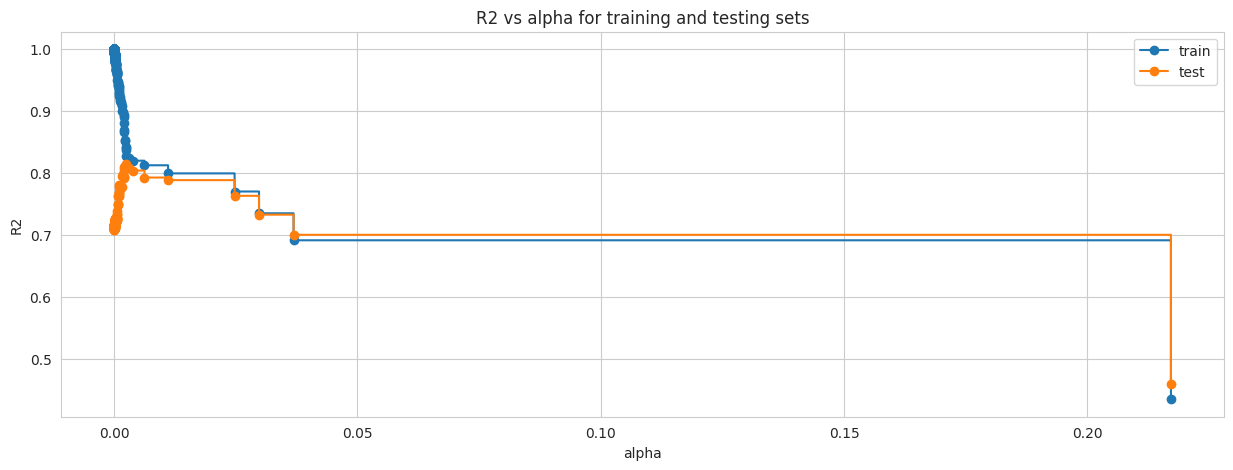

In [ ]:
fig, ax = plt.subplots (figsize=(15,5))
ax.set_xlabel("alpha")

ax.set_ylabel("R2")
ax.set_title("R2 vs alpha for training and testing sets")
ax.plot(ccp_alphas, r2_train, marker='o', label="train",
drawstyle="steps-post",)

ax.plot(ccp_alphas, r2_test, marker='o', label="test",
drawstyle="steps-post")

ax.legend()
plt.show()


In [ ]:
index_best_model = np.argmax(r2_test)
best_model = regressors[index_best_model]
print(best_model)


DecisionTreeRegressor(ccp_alpha=0.0023869713844277404, random_state=1)


In [ ]:
best_model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0023869713844277404, random_state=1)

In [ ]:
get_r2_score(best_model)

R2 on training set:  0.8426621635648213
R2 on test set:  0.8141398484462545


**build new model on besis of ccp alpha 0.02**

In [ ]:
best_model2 = DecisionTreeRegressor(ccp_alpha=0.02, random_state=1)
best_model2.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.02, random_state=1)

In [ ]:
get_r2_score(best_model2)

R2 on training set:  0.7993471462790731
R2 on test set:  0.7884475383533744


# **Observation**

# **<font color = "brown" size = 6>Vizualize the  post-prunning Tree </font>**

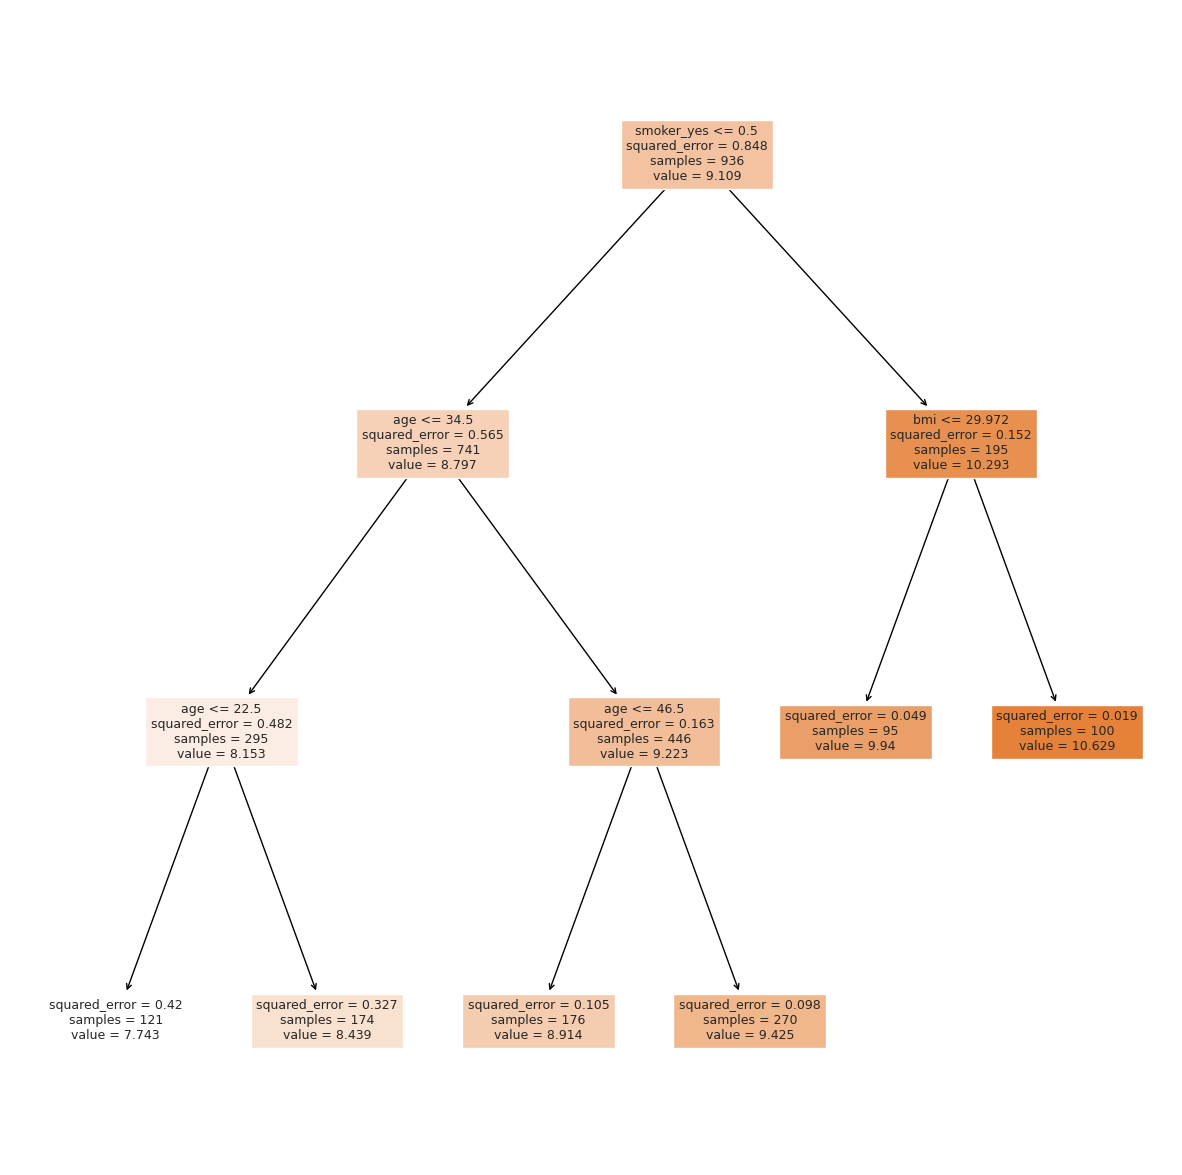

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming you have already defined regressor and feature_names

plt.figure(figsize=(15, 15))
out = plot_tree(best_model2, feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None)

# Below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()


In [ ]:
# importance of features in the tree building (The importance of a feature is computed as the
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance.


# Assuming best_model is the correct model
importance_df = pd.DataFrame(best_model2.feature_importances_, columns=["Imp"], index=x_train.columns)
sorted_importance = importance_df.sort_values(by="Imp", ascending=False)

print(sorted_importance)

                       Imp
smoker_yes        0.544612
age               0.418854
bmi               0.036534
const             0.000000
sex_male          0.000000
children_yes      0.000000
region_northwest  0.000000
region_southeast  0.000000
region_southwest  0.000000


# **<font color = "brown" size = 7>Essemble Method </font>**

* **Bagging**
* **Boosting**

# **<font color = "brown" size = 5>Bagging Regressor </font>**

In [ ]:
from sklearn.ensemble import BaggingRegressor

### **<font color = "black" size = 5>Build model using Bagging Regressor </font>**

In [ ]:
bagging = BaggingRegressor(random_state=1)
bagging.fit(x_train,y_train)

BaggingRegressor(random_state=1)

In [ ]:
get_r2_score(bagging)

R2 on training set:  0.9679698472592456
R2 on test set:  0.7791046721945191


### **<font color = "black" size = 5>Observation </font>**
we can see the r-square test and train there is maximum difference between each other and we need just difference within 2% so here our model not good

### **<font color = "brown" size = 6>Bagging Regressor with weighted Decision Tree </font>**

In [ ]:
bagging_weight = BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='squared_error',random_state=1),random_state=1)
bagging_weight.fit(x_train,y_train)


BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=1),
                 random_state=1)

In [ ]:
get_r2_score(bagging_weight)

R2 on training set:  0.9679698472592456
R2 on test set:  0.7791046721945191


### **<font color = "blue" size = 5>Observation </font>**
we can see the r-square test and train there is maximum difference between each other and we need just difference within 2% so here our model not good

### **<font color = "brown" size = 5> Hyperparameter-Tunning using Bagging Regressor </font>**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Create a base regressor (Decision Tree with class weights)
reg1 = DecisionTreeRegressor(criterion='squared_error', random_state=1)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'base_estimator': [reg1],
    'n_estimators': [5, 7, 15, 51, 101],
    'max_features': [0.7, 0.8, 0.9, 1]
}

# Create the BaggingRegressor with default parameters (you can customize them if needed)
bagging_regressor = BaggingRegressor(random_state=1, bootstrap=True)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(bagging_regressor, param_distributions=param_dist, n_iter=10, scoring='r2', cv=5, random_state=1)

# Fit the RandomizedSearchCV on the training data
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=BaggingRegressor(random_state=1),
                   param_distributions={'base_estimator': [DecisionTreeRegressor(random_state=1)],
                                        'max_features': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': [5, 7, 15, 51, 101]},
                   random_state=1, scoring='r2')

In [ ]:
get_r2_score(random_search)

R2 on training set:  0.9658730692998792
R2 on test set:  0.8030849918570774


### **<font color = "blue" size = 5>Observation </font>**
we can see the r-square test and train there is maximum difference between each other and we need just difference within 2% so here our model not good

**<font color = "brown" size = 5> Random Forest </font>**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# **<font color = "brown" size = 5>Build model using Random Forest </font>**

In [ ]:
random_forest=RandomForestRegressor(random_state=1)
random_forest.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [ ]:
get_r2_score(random_forest)

R2 on training set:  0.9721602645504567
R2 on test set:  0.8019751488781108


### **<font color = "blue" size = 5>Observation </font>**
we can see the r-square test and train there is maximum difference between each other and we need just difference within 2% so here our model not good

# **<font color = "brown" size = 5>Random Forest Hyperparameter-Tunning </font>**

In [ ]:
# Choose the type of regressor.
rf_regressor = RandomForestRegressor(random_state=1)

# Randomized grid of parameters to choose from
random_parameters = {
    "n_estimators": [110, 251, 501],
    "min_samples_leaf": [1, 6, 1],
    "max_features": [0.7, 0.9, 'log2', 'sqrt'],
    "max_samples": [0.7, 0.9, None],
}

# Run the randomized search
random_search_regressor = RandomizedSearchCV(rf_regressor, random_parameters, n_iter=10, scoring='r2', cv=5, random_state=1)
random_search_regressor = random_search_regressor.fit(x_train, y_train)

In [ ]:
get_r2_score(random_search_regressor)

R2 on training set:  0.8810446023974707
R2 on test set:  0.8252809023260912


### **<font color = "blue" size = 5>Observation </font>**
we can see the r-square test and train there is maximum difference between each other and we need just difference within 2% so here our model not good

# **<font color = "brown" size = 10>Boosting </font>**

# **<font color = "Black" size = 5>Ada Boosting </font>**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada_boost_regressor=AdaBoostRegressor(random_state=1)
ada_boost_regressor.fit(x_train,y_train)

AdaBoostRegressor(random_state=1)

In [ ]:
get_r2_score(ada_boost_regressor)

R2 on training set:  0.7432064168406463
R2 on test set:  0.6912963565460966


### **<font color = "blue" size = 5>Observation </font>**
we can see the r-square test and train there is maximum difference between each other and we need just difference within 2% so here our model not good

# **<font color = "brown" size = 5>Hyperparameter tunning with Adaboosting </font>**

In [ ]:
# Choose the type of regressor.
ab_regressor = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10, 100, 10),
              'learning_rate': [1, 0.1, 0.5, 0.01]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(r2_score)

# Run the randomized grid search
randomized_search_obj = RandomizedSearchCV(ab_regressor, parameters, scoring=scorer, cv=5, n_iter=10, random_state=1)
randomized_search_obj = randomized_search_obj.fit(x_train, y_train)

# Set the regressor to the best combination of parameters
ab_regressor_tuned_randomized = randomized_search_obj.best_estimator_

In [ ]:
get_r2_score(ab_regressor_tuned_randomized)

R2 on training set:  0.8144548480101004
R2 on test set:  0.798214801213667


### **<font color = "blue" size = 5>Observation </font>**
we can see the r-square test and train there is maximum difference between each other and we need just difference within 2% so here our model not good

# **Gradiant Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
Gradiant_estimator=GradientBoostingRegressor(random_state=1)
Gradiant_estimator.fit(x_train,y_train)

GradientBoostingRegressor(random_state=1)

In [ ]:
get_r2_score(Gradiant_estimator)

R2 on training set:  0.8844749967374916
R2 on test set:  0.8291822489383536


### **<font color = "blue" size = 5>Observation </font>**
we can see the r-square test and train there is maximum difference between each other and we need just difference within 2% so here our model not good

**<font color = "brown" size = 5>Hyperparameter tunning with Gradiant boosting </font>**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Choose the type of regressor.
gb_regressor_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50, 200, 25),
              'subsample': [0.7, 0.8, 0.9, 1],
              'max_features': [0.7, 0.8, 0.9, 1],
              'max_depth': [3, 5, 7, 10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(r2_score)

# Run the randomized grid search
randomized_search_obj = RandomizedSearchCV(gb_regressor_tuned, parameters, scoring=scorer, cv=5, n_iter=10, random_state=1)
randomized_search_obj = randomized_search_obj.fit(x_train, y_train)

# Set the regressor to the best combination of parameters
gradiant_regressor_tuned_randomized = randomized_search_obj.best_estimator_

In [ ]:
get_r2_score(gradiant_regressor_tuned_randomized)

R2 on training set:  0.8969375562377547
R2 on test set:  0.8231548491524842


### **<font color = "blue" size = 5>Observation </font>**
we can see the r-square test and train there is maximum difference between each other and we need just difference within 2% so here our model not good

# **XG Boosting**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_estimator=XGBRegressor(random_state=1)
xgb_estimator.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [ ]:
get_r2_score(xgb_estimator)

R2 on training set:  0.9956732865580755
R2 on test set:  0.7498061075338222


### **<font color = "blue" size = 5>Observation </font>**
we can see the r-square test and train there is maximum difference between each other and we need just difference within 2% so here our model not good

**<font color = "brown" size = 5>Hyperparameter tunning with XG boosting </font>**

In [ ]:
# Choose the type of regressor.
xgb_regressor = XGBRegressor(random_state=1)

# Randomized grid of parameters to choose from
param_dist = {
    'n_estimators': [50, 200,500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 10],
    'subsample': [0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.7, 0.8, 0.9, 1],
    'gamma': [0, 1, 5],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(r2_score)

# Run the randomized search
random_search_obj = RandomizedSearchCV(xgb_regressor, param_distributions=param_dist, n_iter=10, scoring=scorer, cv=5, random_state=1)
random_search_obj.fit(x_train, y_train)

# Set the regressor to the best combination of parameters
xgb_regressor_tuned = random_search_obj.best_estimator_

In [ ]:
get_r2_score(xgb_regressor_tuned)

R2 on training set:  0.8466733457035645
R2 on test set:  0.8337978269076605


### **<font color = "blue" size = 5>Observation </font>**
we can see the r-square test and train there is minimum  difference is 0.13 between each other and we need just difference within 2% so here our model
 good